Dany jest zbiór argumentów (X) oraz wartości (y) funkcji jednej zmiennej w postaci obiektu DataFrame df:

<AxesSubplot:xlabel='x', ylabel='y'>

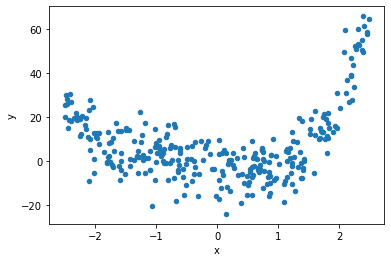

In [73]:
import numpy as np
import pandas as pd

size = 300
X = np.random.rand(size) * 5 - 2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4 * (X ** 4) + w3 * (X ** 3) + w2 * (X ** 2) + w1 * X + w0 + np.random.randn(size) * 8 - 4
df = pd.DataFrame({'x': X, 'y': y})
df.to_csv('dane_do_regresji.csv', index=None)
df.plot.scatter(x='x', y='y')

Zapisz w osobnym DataFrame wartości MSE dla zbiorów uczących i testujących dla
regresorów; kolumny: train_mse, test_mse, wiersze: lin_reg, knn_3_reg, knn_5_reg,poly_2_reg, poly_3_reg, poly_4_reg, poly_5_reg.

In [74]:
index = ['lin_reg', 'knn_3_reg', 'knn_5_reg', 'poly_2_reg', 'poly_3_reg', 'poly_4_reg', 'poly_5_reg']
mse = pd.DataFrame(columns=['train_mse', 'test_mse'], index=index)
mse

,train_mse,test_mse
lin_reg,NaN,NaN
knn_3_reg,NaN,NaN
knn_5_reg,NaN,NaN
poly_2_reg,NaN,NaN
poly_3_reg,NaN,NaN
poly_4_reg,NaN,NaN
poly_5_reg,NaN,NaN


Podziel ww. zbiór na zbiory: uczący oraz testujący w proporcji 80:20.

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Wykonaj następujące regresje na ww. zbiorze:
1. liniową,
2. KNN, dla k = 3 oraz k = 5,
3. wielomianową 2, 3, 4 i 5 rzędu

liniowa

In [76]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))
print(lin_reg.intercept_, lin_reg.coef_, "\n")

[7.56244184] [[2.52487464]] 



Reprezentacja danych wraz z prostą regresji liniowej

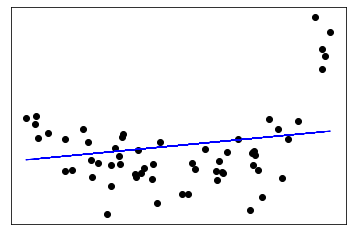

In [77]:
import matplotlib.pyplot as plt

y_pred_test = lin_reg.predict(X_test.reshape(-1, 1))
y_pred_train = lin_reg.predict(X_train.reshape(-1, 1))

plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred_test, color="blue", linewidth=1)
plt.xticks(())
plt.yticks(())
plt.show()

In [78]:
mse_lin_test = mean_squared_error(y_test, y_pred_test)
mse_lin_train = mean_squared_error(y_train, y_pred_train)

KNN, dla k = 3

In [79]:
from sklearn.neighbors import KNeighborsRegressor

h = 0.02  # step size in the mesh
knn_3_reg = KNeighborsRegressor(n_neighbors=3)
knn_3_reg.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))

KNeighborsRegressor(n_neighbors=3)

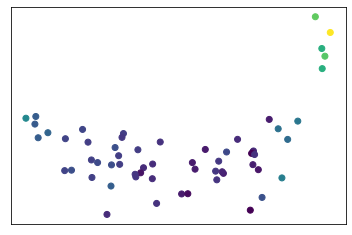

In [80]:
y_pred_test = knn_3_reg.predict(X_test.reshape(-1, 1))
y_pred_train = knn_3_reg.predict(X_train.reshape(-1, 1))

plt.scatter(X_test, y_test, c=y_pred_test)
plt.xticks(())
plt.yticks(())
plt.show()

In [81]:
mse_knn3_test = mean_squared_error(y_test, y_pred_test)
mse_knn3_train = mean_squared_error(y_train, y_pred_train)

KNN, dla k = 5,

In [82]:
from sklearn.neighbors import KNeighborsRegressor

knn_5_reg = KNeighborsRegressor(n_neighbors=5)
knn_5_reg.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))

KNeighborsRegressor()

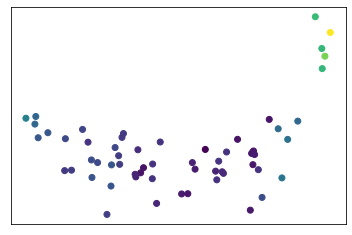

In [83]:
y_pred_test = knn_5_reg.predict(X_test.reshape(-1, 1))
y_pred_train = knn_5_reg.predict(X_train.reshape(-1, 1))

plt.scatter(X_test, y_test, c=y_pred_test)
plt.xticks(())
plt.yticks(())
plt.show()

In [84]:
mse_knn5_test = mean_squared_error(y_test, y_pred_test)
mse_knn5_train = mean_squared_error(y_train, y_pred_train)

Wielomianowa

rząd 2

In [85]:
from sklearn.preprocessing import PolynomialFeatures

poly_feature_2 = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_feature_2.fit_transform(X_train.reshape(-1, 1))
poly_2_reg = LinearRegression()
poly_2_reg.fit(X_poly, y_train)

LinearRegression()

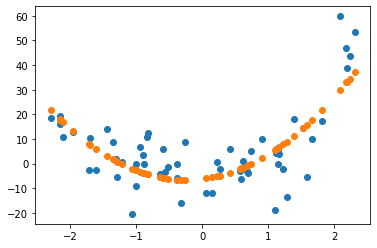

In [86]:
y_pred_test = poly_2_reg.predict(poly_feature_2.fit_transform(X_test.reshape(-1, 1)))
y_pred_train = poly_2_reg.predict(poly_feature_2.fit_transform(X_train.reshape(-1, 1)))

plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred_test)

In [87]:
mse_poli2_test = mean_squared_error(y_test, y_pred_test)
mse_poli2_train = mean_squared_error(y_train, y_pred_train)

rząd 3

In [88]:
from sklearn.preprocessing import PolynomialFeatures

poly_feature_3 = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_feature_3.fit_transform(X_train.reshape(-1, 1))
poly_3_reg = LinearRegression()
poly_3_reg.fit(X_poly, y_train)

LinearRegression()

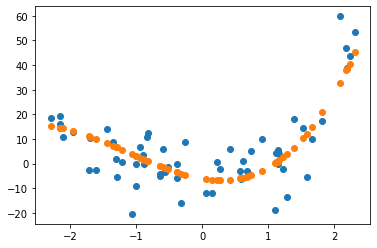

In [89]:
y_pred_test = poly_3_reg.predict(poly_feature_3.fit_transform(X_test.reshape(-1, 1)))
y_pred_train = poly_3_reg.predict(poly_feature_3.fit_transform(X_train.reshape(-1, 1)))
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred_test)

In [90]:
mse_poli3_test = mean_squared_error(y_test, y_pred_test)
mse_poli3_train = mean_squared_error(y_train, y_pred_train)

rząd 4

In [91]:
from sklearn.preprocessing import PolynomialFeatures

poly_feature_4 = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_feature_4.fit_transform(X_train.reshape(-1, 1))
poly_4_reg = LinearRegression()
poly_4_reg.fit(X_poly, y_train)

LinearRegression()

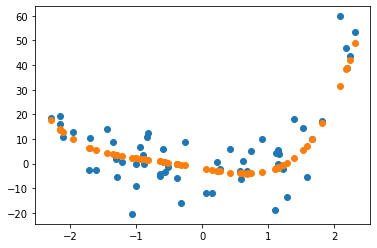

In [92]:
y_pred_test = poly_4_reg.predict(poly_feature_4.fit_transform(X_test.reshape(-1, 1)))
y_pred_train = poly_4_reg.predict(poly_feature_4.fit_transform(X_train.reshape(-1, 1)))

plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred_test)

In [93]:
mse_poli4_test = mean_squared_error(y_test, y_pred_test)
mse_poli4_train = mean_squared_error(y_train, y_pred_train)

rząd 5

In [94]:
from sklearn.preprocessing import PolynomialFeatures

poly_feature_5 = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly_feature_5.fit_transform(X_train.reshape(-1, 1))
poly_5_reg = LinearRegression()
poly_5_reg.fit(X_poly, y_train)

LinearRegression()

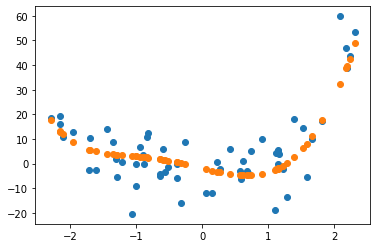

In [95]:
y_pred_test = poly_5_reg.predict(poly_feature_5.fit_transform(X_test.reshape(-1, 1)))
y_pred_train = poly_5_reg.predict(poly_feature_5.fit_transform(X_train.reshape(-1, 1)))

plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred_test)

In [96]:
mse_poli5_test = mean_squared_error(y_test, y_pred_test)
mse_poli5_train = mean_squared_error(y_train, y_pred_train)

In [97]:
mse = pd.DataFrame({'train_mse': [mse_lin_train, mse_knn3_train, mse_knn5_train, mse_poli2_train, mse_poli3_train,
                                  mse_poli4_train, mse_poli5_train],
                    'test_mse': [mse_lin_test, mse_knn3_test, mse_knn5_test, mse_poli2_test, mse_poli3_test,
                                 mse_poli4_test, mse_poli5_test]}, index=index)

In [98]:
reg = [(lin_reg, None), (knn_3_reg, None), (knn_5_reg, None), (poly_2_reg, poly_feature_2),
       (poly_3_reg, poly_feature_3), (poly_4_reg, poly_feature_4),
       (poly_5_reg, poly_feature_5)]

### piklowanie

In [99]:
import pickle

with open('mse.pkl', 'wb') as f:
    pickle.dump(mse, f)
    # mse.to_pickle('mse.pkl')
with open('reg.pkl', 'wb') as f:
    pickle.dump(reg, f)

### dobrze, mówię sprawdzam

In [100]:
with open('mse.pkl', 'rb') as f:
    print(pickle.load(f))
with open('reg.pkl', 'rb') as f:
    print(pickle.load(f))

             train_mse    test_mse
lin_reg     251.052090  231.762000
knn_3_reg    35.758931   83.631106
knn_5_reg    42.743708   93.108086
poly_2_reg   93.808394   94.892821
poly_3_reg   69.202964   79.628697
poly_4_reg   56.479455   73.223071
poly_5_reg   55.862741   74.260470
[(LinearRegression(), None), (KNeighborsRegressor(n_neighbors=3), None), (KNeighborsRegressor(), None), (LinearRegression(), PolynomialFeatures(include_bias=False)), (LinearRegression(), PolynomialFeatures(degree=3, include_bias=False)), (LinearRegression(), PolynomialFeatures(degree=4, include_bias=False)), (LinearRegression(), PolynomialFeatures(degree=5, include_bias=False))]
